In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.base import clone
from sklearn.base import BaseEstimator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.multiclass import OneVsOneClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier


In [2]:
%matplotlib inline

In [3]:
mnist = fetch_openml('mnist_784', cache=True)

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
some_digit = X.loc[36000].values.reshape((28, 28))

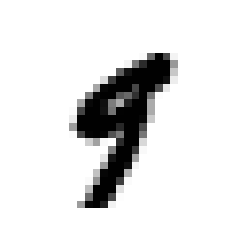

In [9]:
plt.imshow(some_digit, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [10]:
y[36000]

'9'

In [11]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [12]:
X_train.shape

(60000, 784)

In [13]:
y_train.shape

(60000,)

In [14]:
y_test.shape

(10000,)

In [15]:
X_test.shape

(10000, 784)

### Shuffling training set for even distribution of numbers

In [16]:
shuffle_index = np.random.permutation(60000)

In [17]:
X_train, y_train = X_train.iloc[shuffle_index].values, y_train.iloc[shuffle_index].values

In [18]:
X_train.shape

(60000, 784)

# The 5-Detector [Binary Classifier]

In [19]:
y_train_5 = (y_train == '5')

In [20]:
y_test_5 = (y_test == '5')

In [21]:
y_train_5

array([False,  True, False, ..., False, False, False])

In [22]:
sgd_clf = SGDClassifier(random_state=42)

In [23]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf_predicted = sgd_clf.predict(X_train[:100])

In [25]:
y_train[:100]

['0', '5', '2', '4', '7', ..., '7', '4', '9', '9', '9']
Length: 100
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

# Evaluation

Uike Regression tasks, evaluation in Classification is a bit more tricky

In [26]:
sgd_clf = SGDClassifier(random_state=42)

In [27]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [28]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf = clone(sgd_clf)
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    

0.9194
0.96115
0.95245


In [29]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96385, 0.92485, 0.96825])

### Creating a dumb class for better understanding

In [30]:
class Never5Class(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X, y=None):
        return np.zeros((len(X), 1), dtype=bool)

In [31]:
never_5_clf = Never5Class()

In [32]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91105, 0.9094 , 0.9085 ])

# Confusion Matrix

In [33]:
y_predicted = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [34]:
confusion_matrix(y_train_5, y_predicted)

array([[52520,  2059],
       [  802,  4619]])

# Precision and Recall

In [35]:
precision_score(y_train_5, y_predicted)

0.6916741539383049

In [36]:
recall_score(y_train_5, y_predicted)

0.852056816085593

## Calculating F1 Score - Harmonic Mean of Precision and recall

In [37]:
f1_score(y_train_5, y_predicted)

0.7635341763782131

# Precision Recall Tradeoff

In [38]:
y_train[22000]

'9'

In [39]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [40]:
some_data = X_train[22000].reshape((1, -1))

In [41]:
y_scores = sgd_clf.predict(some_data)

In [42]:
y_scores

array([False])

In [43]:
decision_score = sgd_clf.decision_function(some_data)

In [44]:
threshold = 0

In [45]:
(decision_score > threshold)

array([False])

increasing threshold

In [46]:
threshold = 20000

In [47]:
(decision_score > threshold)

array([False])

This implies that increasing threshold, decreases recall

In [48]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

Now that we have decision scores of our whole data, let draw the precision recall curve

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [50]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])

In [51]:
y_train_5.shape

(60000,)

In [52]:
y_scores.shape

(60000,)

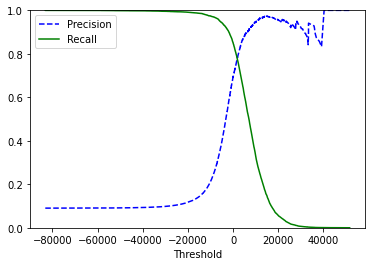

In [53]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [54]:
thresholds.shape

(59909,)

In [55]:
precisions.shape

(59910,)

In [56]:
recalls.shape

(59910,)

Text(0, 0.5, 'Recall')

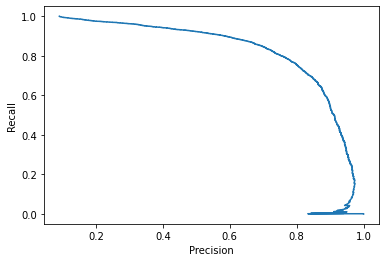

In [57]:
plt.plot(precisions, recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')

In [58]:
y_scores

array([-42938.04379217,   8484.61827705, -23191.1152259 , ...,
       -10897.50360004,  -6254.29768043, -10295.4652338 ])

In [59]:
thresholds

array([-83126.20762518, -83037.44105752, -82367.94807604, ...,
        43263.70868614,  46341.36572009,  51657.58923376])

In [60]:
y_scores.min()

-140439.00954399724

In [61]:
thresholds.min()

-83126.20762518255

In [62]:
y_predicted_90 = (y_scores > 3000)

In [63]:
precision_score(y_train_5, y_predicted_90)

0.8225772545722094

In [64]:
recall_score(y_train_5, y_predicted_90)

0.7218225419664268

In [65]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [66]:
def plot_roc_curve(fpr, tpr, thresholds):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

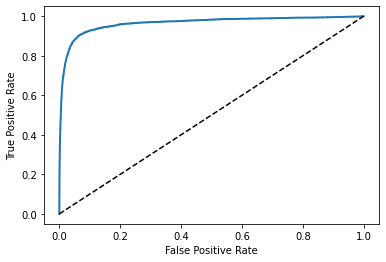

In [67]:
plot_roc_curve(fpr, tpr, thresholds)

In [68]:
roc_auc_score(y_train_5, y_scores)

0.9641814642354417

# Random Forest Classifier

In [69]:
forest_clf = RandomForestClassifier(random_state=42)

In [70]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, method='predict_proba', cv=3)

In [71]:
y_probas_forest

array([[0.96, 0.04],
       [0.32, 0.68],
       [1.  , 0.  ],
       ...,
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.82, 0.18]])

In [72]:
y_forest_score = y_probas_forest[:, 1]

In [73]:
y_forest_score

array([0.04, 0.68, 0.  , ..., 0.04, 0.  , 0.18])

In [74]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5, y_forest_score)

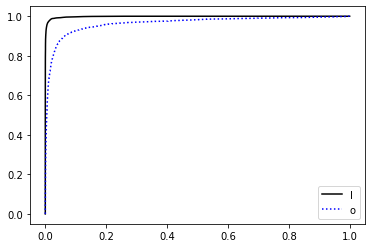

In [75]:
plt.plot(fpr_forest, tpr_forest, 'k-', label='RFC')
plt.plot(fpr, tpr, 'b:', label='SGD')
plt.legend('lower right')
plt.show()

In [76]:
roc_auc_score(y_train_5, y_forest_score)

0.9984921998175574

In [77]:
y_forest_predicted = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [78]:
precision_score(y_train_5, y_forest_predicted)

0.9903523489932886

In [79]:
recall_score(y_train_5, y_forest_predicted)

0.8710570005534034

In [80]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [81]:
sgd_clf.predict(X_train[26000].reshape(1, -1))

array(['6'], dtype='<U1')

In [82]:
y_train[26000]

'5'

In [83]:
np.argmax(sgd_clf.decision_function(X_train[28000].reshape(1, -1))[0])

8

In [84]:
sgd_clf.classes_[6]

'6'

In [85]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [86]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [87]:
ovo_clf.predict(X_train[28000].reshape(1, -1))

array(['8'], dtype=object)

In [88]:
len(ovo_clf.estimators_)

45

In [89]:
forest_clf = RandomForestClassifier()

In [90]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
forest_clf.predict(X_train[28000].reshape(1, -1))

array(['7'], dtype=object)

In [92]:
forest_clf.predict_proba(X_train[28000].reshape(1, -1))

array([[0.01, 0.01, 0.03, 0.03, 0.06, 0.04, 0.05, 0.7 , 0.05, 0.02]])

In [93]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.8768 , 0.85365, 0.8653 ])

In [95]:
scaler = StandardScaler()

In [106]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64()))

In [107]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/home/vm/Desktop/Project/M_L/classify-MNIST/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9042 , 0.9032 , 0.90375])

In [108]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/home/vm/Desktop/Project/M_L/classify-MNIST/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [110]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

In [111]:
conf_matrix

array([[5608,    0,   17,    8,    8,   52,   35,    6,  188,    1],
       [   1, 6429,   41,   22,    3,   45,    5,    6,  177,   13],
       [  25,   30, 5284,   94,   66,   20,   69,   40,  318,   12],
       [  29,   23,  118, 5261,    1,  226,   25,   42,  340,   66],
       [  13,   14,   42,    8, 5261,   12,   39,   25,  270,  158],
       [  33,   18,   33,  159,   56, 4520,   79,   16,  439,   68],
       [  31,   17,   48,    2,   38,   93, 5563,    4,  122,    0],
       [  22,   15,   53,   22,   48,   12,    4, 5721,  158,  210],
       [  19,   67,   47,   94,    3,  119,   34,    8, 5414,   46],
       [  25,   24,   30,   63,  123,   39,    1,  176,  306, 5162]])

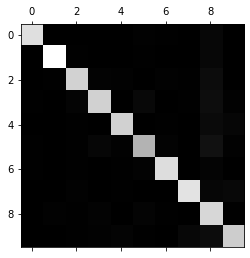

In [114]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

In [115]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)

In [116]:
norm_conf_mx = conf_matrix / row_sums

In [117]:
np.fill_diagonal(norm_conf_mx, 0)

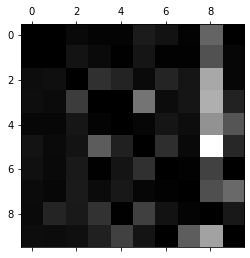

In [119]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel classification

In [130]:
y_train_large = (y_train.astype(np.int64()) >= 7)

In [132]:
y_train_large

array([False, False, False, ...,  True, False,  True])

In [134]:
y_train_odd = (y_train.astype(np.int64()) % 2 == 1)

In [136]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [137]:
y_multilabel

array([[False, False],
       [False,  True],
       [False, False],
       ...,
       [ True,  True],
       [False,  True],
       [ True, False]])

In [138]:
knn_clf = KNeighborsClassifier()

In [139]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [142]:
some_digit = [X_train[26000]]

In [143]:
knn_clf.predict(some_digit)

array([[False, False]])

In [144]:
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [147]:
f1_score(y_multilabel, y_train_pred_knn, average='macro')

0.9769515661008509

# Multioutput Classification

## Pixel Noise Remover

In [148]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [149]:
X_train_noised = X_train + noise

In [150]:
noise = np.random.randint(0, 100, (len(X_test), 784))

In [151]:
X_test_noised = X_test + noise

In [152]:
y_train_noised = X_train

In [153]:
y_test_noised = X_test

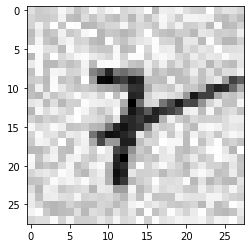

In [160]:
plt.imshow(X_train_noised[28000].reshape((28, 28)), cmap=plt.cm.binary)

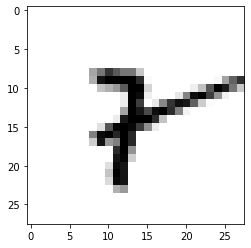

In [161]:
plt.imshow(X_train[28000].reshape((28, 28)), cmap=plt.cm.binary)

In [162]:
knn_clf.fit(X_train_noised, y_train_noised)

KNeighborsClassifier()

In [165]:
clean_digit = knn_clf.predict([X_train_noised[26000]])

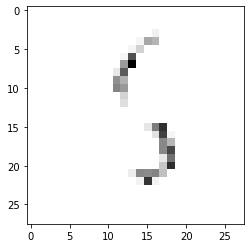

In [166]:
plt.imshow(clean_digit.reshape((28, 28)), cmap=plt.cm.binary)